# Predicting  The Flight Ticket Price

## Import the libraries
Import Necessary Libraries To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [1]:
import sys    #for python version
import sklearn
import pandas
import numpy
import seaborn
import matplotlib

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scikit-learn: 0.22.1
Pandas: 1.0.1
Numpy: 1.18.1
seaborn: 0.10.0
matplotlib: 3.1.3


## Exploratory Data Analysis 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# load the dataset

In [68]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

In training dataset we target variable Price but we may not this column in test data

In [69]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [70]:
df_test.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


## All About data
<b>FEATURES</b>: 

- <b>Airline</b>          : The name of the airline.

- <b>Date_of_Journey</b>  : The date of the journey

- <b>Source</b>           : The source from which the service begins.

- <b>Destination</b>      : The destination where the service ends.

- <b>Route</b>            : The route taken by the flight to reach the destination.

- <b>Dep_Time</b>         : The time when the journey starts from the source.

- <b>Arrival_Time</b>     : Time of arrival at the destination.

- <b>Duration</b>         : Total duration of the flight.

- <b>Total_Stops</b>      : Total stops between the source and destination.

- <b>Additional_Info</b>  : Additional information about the flight

- <b>Price</b>            : The price of the ticket

For performing data analysis we can combine both dataset for better understanding of data

In [71]:
df=df_train.append(df_test,sort=False)

In [72]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [73]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [74]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df),len(df.columns)))

Input data has 13354 rows and 11 col


Here we can see we have 13354 row after both train and test data combined and 11 columns .

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB
None


From the above information we came to know that all features are in string format expect the price we need to convert the data according their features and data types.

## Missing values

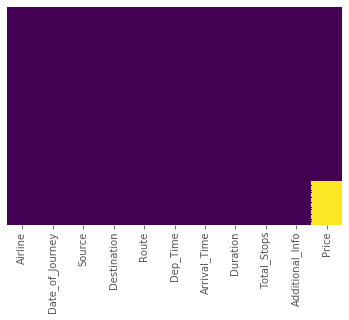

In [76]:
#check for null values in dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

By checking the null values we came to know we have null values more in price variable we can impute this missing values 

In [78]:
#Imputing missing values
df['Price'].fillna(df['Price'].mean(),inplace = True)

In [79]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


## Feature Engineering

Now we first separate the <b>Date_of_journey</b> into <b>year</b> ,<b>date</b>, <b>month</b> indivisually as it is in string format we can split by using <b>/</b> operator based on the index values.

In [80]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)

In [81]:
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)

In [82]:
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [83]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [84]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

Next we look up towards arrival time as we done with date of journey . As <b>Arrival time</b> is in string format we can separate with space index so we get only arrival time. 
As we no need of month because we already extracted month from the <b>date_of_journey</b> column.

In [85]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

Now we separate the hours and minutes into new features.

In [86]:
df['Arrival_Hour'] = df['Arrival_Time'] .str.split(':').str[0].astype(int)

In [87]:
df['Arrival_Minute'] = df['Arrival_Time'] .str.split(':').str[1].astype(int)

Next we focus on depature time from we can extract hours and minutes as a new features

In [88]:
df['Departure_Hour'] = df['Dep_Time'] .str.split(':').str[0].astype(int)

In [89]:
df['Departure_Minute'] = df['Dep_Time'] .str.split(':').str[1].astype(int)

In [90]:
df['Duration_hours']=df['Duration'].str.split(' ').str[0]

In [91]:
df['Duration_min']=df['Duration'].str.split(' ').str[1]

In [92]:
df['Duration_hour']=df['Duration_hours'].str.split('h').str[0]

In [93]:
df['Duration_minu']=df['Duration_min'].str.split('m').str[0]

In [94]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_min,Duration_hour,Duration_minu
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,2h,50m,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,7h,25m,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,19h,NaN,19,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,5h,25m,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,4h,45m,4,45


Now we check with Total_stop fature as to make int value we need to separate the values.
In Total_stops we one non-stop so we replace it with the other variable.

In [95]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

In [96]:
df['Stop'] = df['Total_Stops'].str.split(' ').str[0]

In [97]:
df['Stop']=df['Stop'].fillna('1').astype(int)

In [98]:
df.dtypes

Airline              object
Date_of_Journey      object
Source               object
Destination          object
Route                object
Dep_Time             object
Arrival_Time         object
Duration             object
Total_Stops          object
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
Duration_hours       object
Duration_min         object
Duration_hour        object
Duration_minu        object
Stop                  int32
dtype: object

Now We need to divide the Route separately we can observe that in one row we have only boarding and in some other we have both return and boarding journey details so for this we need to divide into five Routes by using string operations.

In [99]:
df['Route_1']=df['Route'].str.split('→ ').str[0]

In [100]:
df['Route_2']=df['Route'].str.split('→ ').str[1]

In [101]:
df['Route_3']=df['Route'].str.split('→ ').str[2]

In [102]:
df['Route_4']=df['Route'].str.split('→ ').str[3]

In [103]:
df['Route_5']=df['Route'].str.split('→ ').str[4]

In [104]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_min,Duration_hour,Duration_minu,Stop,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,1,10,22,20,2h,50m,2,50,0,BLR,DEL,NaN,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,7h,25m,7,25,2,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,19h,NaN,19,NaN,2,DEL,LKO,BOM,COK,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,5h,25m,5,25,1,CCU,NAG,BLR,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,4h,45m,4,45,1,BLR,NAG,DEL,NaN,NaN


Now we need to fill Nan values in Routes columns so impute it with None values and later we can convert into numerical by label encoding.

In [105]:
df['Route_1'].fillna("None",inplace=True)

In [106]:
df['Route_2'].fillna("None",inplace=True)

In [107]:
df['Route_3'].fillna("None",inplace=True)

In [108]:
df['Route_4'].fillna("None",inplace=True)

In [109]:
df['Route_5'].fillna("None",inplace=True)

In [110]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_min,Duration_hour,Duration_minu,Stop,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,1,10,22,20,2h,50m,2,50,0,BLR,DEL,None,None,None
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,7h,25m,7,25,2,CCU,IXR,BBI,BLR,None
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,19h,NaN,19,NaN,2,DEL,LKO,BOM,COK,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,5h,25m,5,25,1,CCU,NAG,BLR,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,4h,45m,4,45,1,BLR,NAG,DEL,None,None


So I think We have extracted maximun information from the features and created a new features . Now we can remove/drop the unwanted features from the dataset

In [111]:
df=df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Duration_hours','Duration_min'],axis=1)

Now we check how many numerical and categorical variables present in the dataset and we convert categorical into numerical by label encoding

In [112]:
Categorical_features = [variables for variables in df.columns if df[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))
print(Categorical_features)

Number of Categorical variables:  11
['Airline', 'Source', 'Destination', 'Additional_Info', 'Duration_hour', 'Duration_minu', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']


In [113]:
numerical_features = [variables for variables in df.columns if df[variables].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  9
['Price', 'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute', 'Stop']


## Convert categorical to Numeric values

In [114]:
from sklearn.preprocessing import LabelEncoder
for variables in Categorical_features:
    le=LabelEncoder()
    df[variables]=le.fit_transform(df[variables].astype(str))

In [115]:
df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minu,Stop,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.000000,24,3,2019,1,10,22,20,11,9,0,0,13,24,12,4
1,1,3,0,8,7662.000000,1,5,2019,13,15,5,50,41,3,2,2,25,1,3,4
2,4,2,1,8,13882.000000,9,6,2019,4,25,9,25,10,11,2,3,32,4,5,4
3,3,3,0,8,6218.000000,12,5,2019,23,30,18,5,38,3,1,2,34,3,12,4
4,3,0,5,8,13302.000000,1,3,2019,21,35,16,50,33,7,1,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,2019,20,25,20,30,15,10,1,2,14,3,12,4
2667,3,3,0,8,9087.064121,27,3,2019,16,55,14,20,11,5,0,2,5,24,12,4
2668,4,2,1,8,9087.064121,6,3,2019,4,25,21,50,40,5,1,3,7,6,12,4
2669,1,2,1,8,9087.064121,6,3,2019,19,15,4,0,6,1,1,3,7,6,12,4


## Feature Selection

In [116]:
df_train=df[0:10683]
df_test=df[10683:]

In [117]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [118]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [119]:
print(selection.feature_importances_)

[0.12552539 0.00958794 0.02280804 0.05651356 0.13138096 0.04582716
 0.         0.02363858 0.01522638 0.01894882 0.01791025 0.02703992
 0.01465989 0.15433846 0.01326512 0.05827773 0.23665343 0.02797697
 0.00042138]


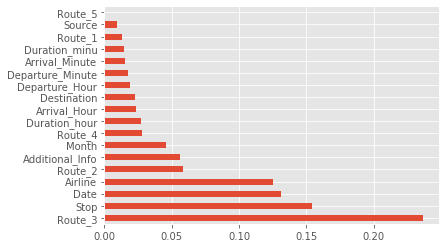

In [120]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(18,keep='first').plot(kind='barh')
plt.show()

from this we can drop year and route 5 column because of less priorty

In [121]:
X=df_train.drop(['Year'],axis=1)

## Model building 

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [123]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators=200,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=20)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [124]:
y_pred = reg_rf.predict(X_test)

In [125]:
reg_rf.score(X_train, y_train)

0.9982899473430196

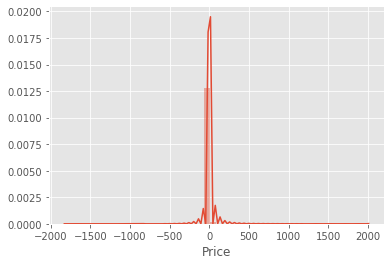

In [126]:
sns.distplot(y_test-y_pred)

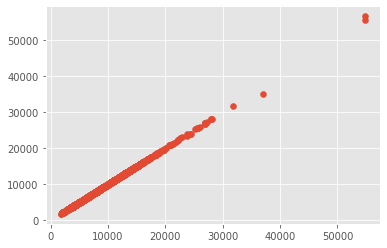

In [127]:
plt.scatter(y_test,y_pred)

In [128]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9999316562294985
MAE: 4.047247629761882
MSE: 2768.7097989834792
RMSE: 52.618530946649194


In [129]:
metrics.r2_score(y_test, y_pred)

0.999863317129868